# Data storytelling using matplotlib - line chart

<div style="max-width: 60ch">

- [data source](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)

> in this lecture notebook I have chosed to copy the code throughout several different data storytelling transformations as it makes the notebook easier to follow 
> in reality when creating these storytelling graphs I'd build reusable functions to keep the code DRY

</div>


In [8]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [9]:
df_yearly_quantity = duckdb.query(
    """
             SELECT 
                year, SUM(quantity) as Quantity
             FROM df
             GROUP BY year
             ORDER BY year"""
).df()

df_yearly_quantity = df_yearly_quantity.set_index("Year")
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


---
## Line chart

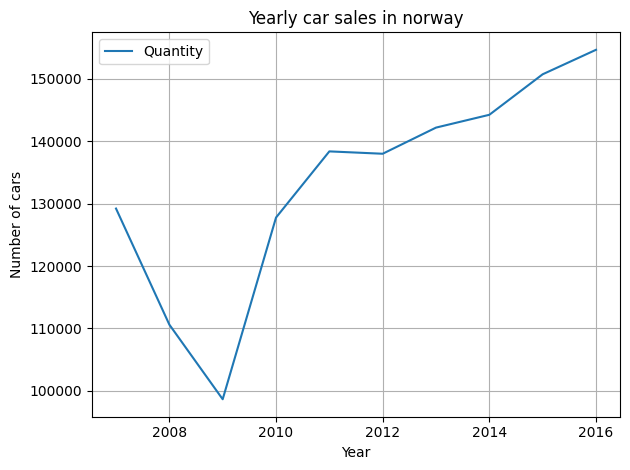

In [10]:
def yearly_car_sales():
    ax = df_yearly_quantity.iloc[:-1].plot()
    ax.grid()
    ax.set(title="Yearly car sales in norway", ylabel="Number of cars")
    fig = ax.get_figure()

    return fig, ax 

fig, ax = yearly_car_sales()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_0.png")

## Storytelling on line graph


### remove clutter

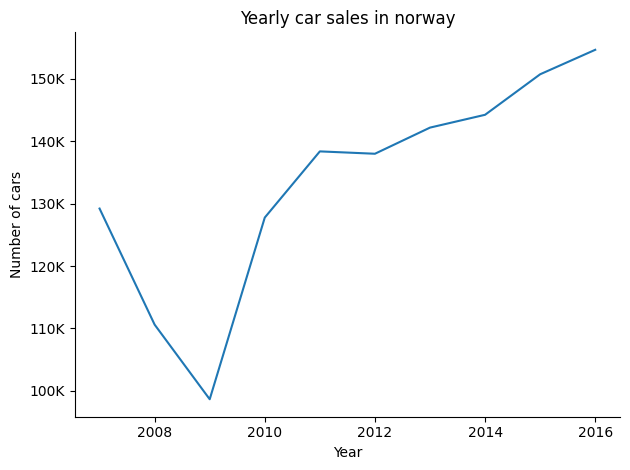

In [11]:
from matplotlib.ticker import FuncFormatter


ax = df_yearly_quantity.iloc[:-1].plot()
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)


ax.set(title="Yearly car sales in norway", ylabel="Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_1.png")

### contrast and descriptive title

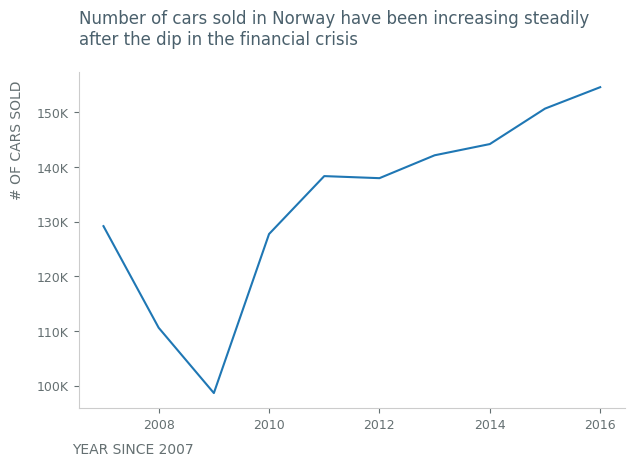

In [12]:

ax = df_yearly_quantity.iloc[:-1].plot()
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color = GRAY_3, pad=20
)

ax.xaxis.set_label_coords(.1, -.1)
ax.yaxis.set_label_coords(-.1, .8)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_3.png")

### annotate

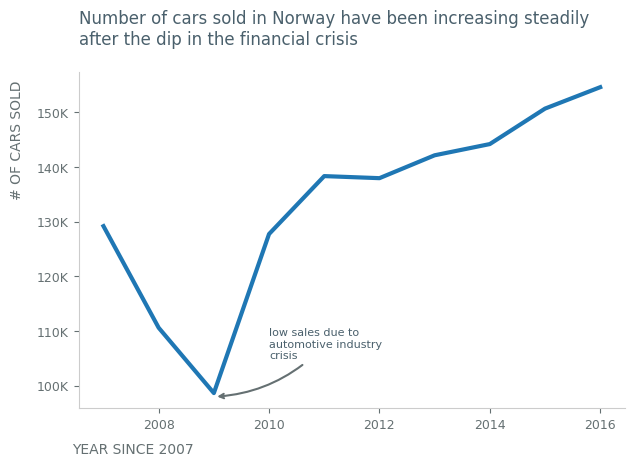

In [13]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.iloc[:-1].plot(linewidth=3)  # , style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=20,
)

ax.xaxis.set_label_coords(0.1, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.8)


arrowprops = dict(
    arrowstyle="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2
)
ax.annotate(
    text="low sales due to \nautomotive industry\ncrisis",
    xy=(2009.01, 98000),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 105000),
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_4.png")

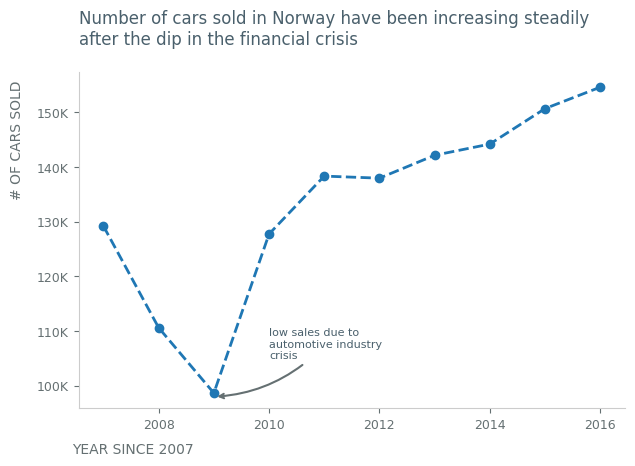

In [14]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.iloc[:-1].plot(linewidth=2, style = "--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.spines["left"].set_color(GRAY_1)
ax.spines["bottom"].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2)
ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=20,
)

ax.xaxis.set_label_coords(0.1, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.8)


arrowprops = dict(
    arrowstyle="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2
)
ax.annotate(
    text="low sales due to \nautomotive industry\ncrisis",
    xy=(2009.01, 98000),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 105000),
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_5.png")